#### <h1 style='color:blue'>**Import Librabries**</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import time
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, mean_squared_error


#### <h1 style='color:blue'>**Read Data**</h1>

In [2]:
df_heart = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [3]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_heart.shape

(303, 14)

In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df_heart['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='output', ylabel='count'>

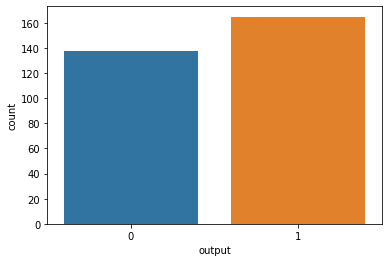

In [9]:
sns.countplot(df_heart['output'])

In [10]:
ax = px.pie(df_heart, names = 'output', template = 'plotly_dark', title = 'Output', hole = 0.5)
ax.show()

<AxesSubplot:>

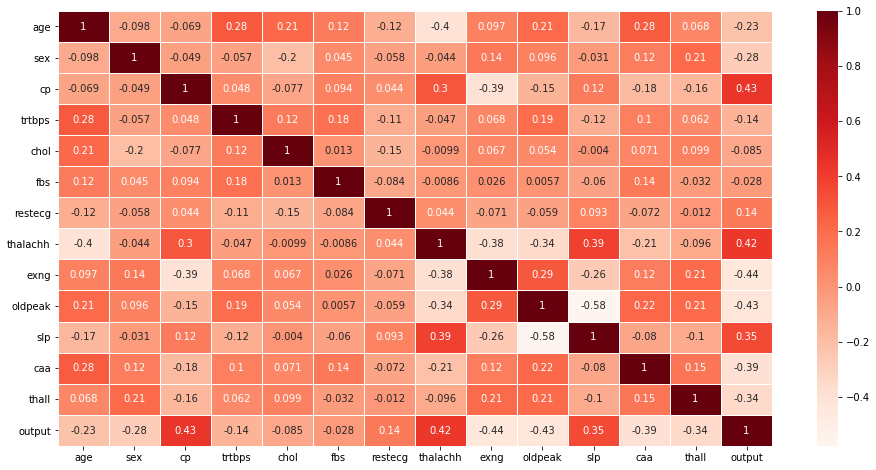

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(df_heart.corr(), linewidth = 1, cmap = 'Reds', annot = True)

In [12]:
X=df_heart.iloc[:, :-1].values
y=df_heart.iloc[:, -1].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
print('Shape of train_dataset :', X_train.shape, y_train.shape)
print('Shape of train_dataset :', X_test.shape, y_test.shape)

Shape of train_dataset : (242, 13) (242,)
Shape of train_dataset : (61, 13) (61,)


### <h1 style='color:blue'>**Model Building**</h1>

In [15]:
def compute(Y_test,Y_pred):
    plt.figure(figsize=(7,3))
    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='OrRd',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

### **1. Logistic Regression**

Execution time of model :0.03471 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



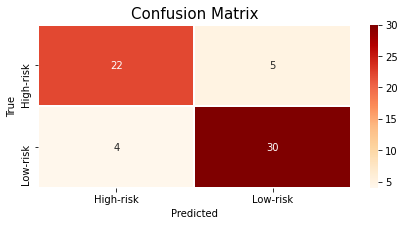

Precision: 0.857 
Recall: 0.882 
F1-Score: 0.87 
Accuracy: 85.246 %
Mean Square Error: 0.148


In [16]:
start = time.time()

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

end = time.time() 

print(f'Execution time of model :{round((end-start), 5)} seconds')

compute(y_test,y_pred)

### **2. KNeighborsClassifier**

Execution time of model : 0.00574 seconds


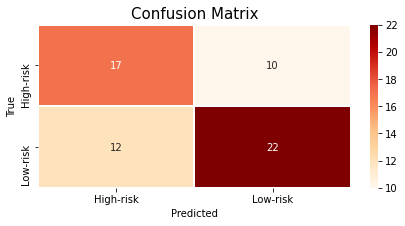

Precision: 0.688 
Recall: 0.647 
F1-Score: 0.667 
Accuracy: 63.934 %
Mean Square Error: 0.361


In [17]:
start = time.time()

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

end = time.time()

print(f'Execution time of model : {round((end - start), 5)} seconds')

compute(y_test, y_pred) 

### **3. Support Vector Machine**

Execution time of model: 0.00552 seconds


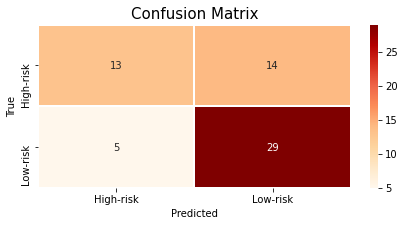

Precision: 0.674 
Recall: 0.853 
F1-Score: 0.753 
Accuracy: 68.852 %
Mean Square Error: 0.311


In [18]:
start = time.time()

model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

end = time.time()

print(f'Execution time of model: {round((end - start), 5)} seconds')

compute(y_test, y_pred)

### **4.DecisionTreeClassifier**

Execution time of model : 0.00211 seconds


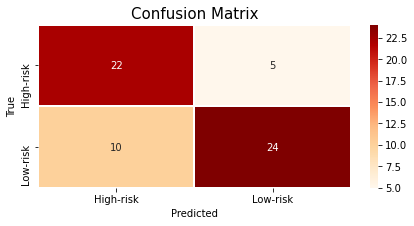

Precision: 0.828 
Recall: 0.706 
F1-Score: 0.762 
Accuracy: 75.41 %
Mean Square Error: 0.246


In [19]:
start = time.time()

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)

end = time.time()

print(f'Execution time of model : {round((end-start), 5)} seconds')

compute(y_test, y_pred)

### **5.RandomForestClassifier**

Execution time of model:0.20639 seconds


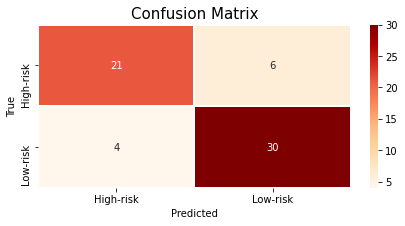

Precision: 0.833 
Recall: 0.882 
F1-Score: 0.857 
Accuracy: 83.607 %
Mean Square Error: 0.164


In [20]:
start = time.time()

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

end = time.time()

print(f'Execution time of model:{round((end - start), 5)} seconds')

compute(y_test, y_pred)

### **6.AdaBoostClassifier**

Execution time of model: 0.10759 seconds


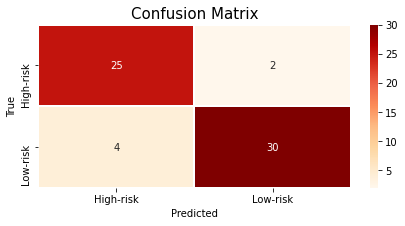

Precision: 0.938 
Recall: 0.882 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [21]:
start = time.time()

model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_test)

end = time.time()

print(f'Execution time of model: {round((end - start), 5)} seconds')

compute(y_test, y_pred)

### **7.GradientBoostingCXlassifier**

Execution time of model: 0.09338 seconds


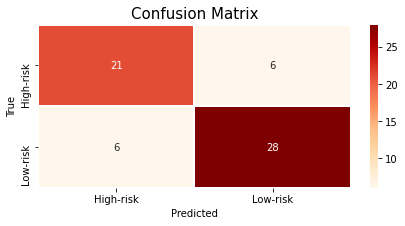

Precision: 0.824 
Recall: 0.824 
F1-Score: 0.824 
Accuracy: 80.328 %
Mean Square Error: 0.197


In [22]:
start = time.time()

model_grad = GradientBoostingClassifier()
model_grad.fit(X_train, y_train)
y_pred = model_grad.predict(X_test)

end = time.time()

print(f'Execution time of model: {round((end - start), 5)} seconds')

compute(y_test, y_pred)

### **8.XGBoostClassifier**

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:16:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Execution time of model: 0.07517 seconds


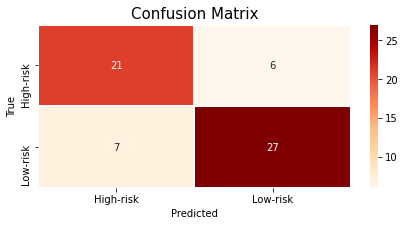

Precision: 0.818 
Recall: 0.794 
F1-Score: 0.806 
Accuracy: 78.689 %
Mean Square Error: 0.213


In [23]:
start = time.time()

model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
y_pred = model_xg.predict(X_test)

end = time.time()

print(f'Execution time of model: {round((end - start), 5)} seconds')

compute(y_test, y_pred)

### <h1 style='color:blue'>**Accuracy Comparision of all model**</h1>

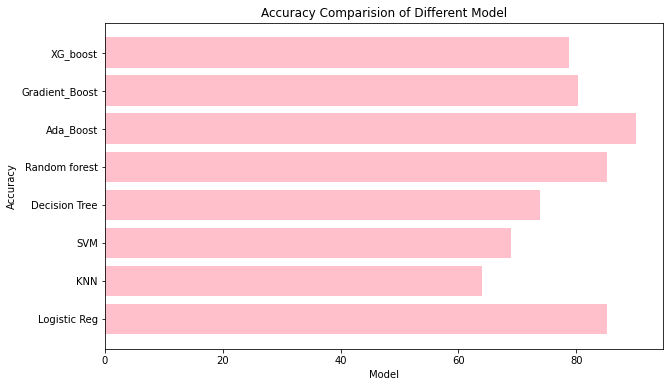

In [24]:
plt.figure(figsize = (10,6))
Model = ['Logistic Reg', 'KNN', 'SVM', 'Decision Tree', 'Random forest', 'Ada_Boost', 'Gradient_Boost', 'XG_boost']
Accuracy = [85.24, 63.93, 68.85, 73.77, 85.24, 90.16, 80.32, 78.69]

plt.barh(Model, Accuracy, color = 'pink')
plt.title('Accuracy Comparision of Different Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

**From above graph is clearly shows that Ada boosting has high accuracy compare to other models.**

### <h1 style='color:blue'>**Execution Time Comparision of all models**</h1>

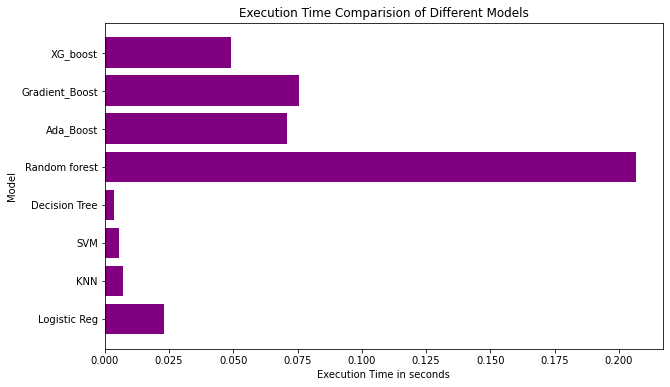

In [25]:
plt.figure(figsize = (10,6))
Model = ['Logistic Reg', 'KNN', 'SVM', 'Decision Tree', 'Random forest', 'Ada_Boost', 'Gradient_Boost', 'XG_boost']
ExecutionTime = [0.0232, 0.0071, 0.0054, 0.0036, 0.2068, 0.0707, 0.0755, 0.0490]

plt.barh(Model, ExecutionTime, color = 'purple')
plt.title('Execution Time Comparision of Different Models')
plt.xlabel('Execution Time in seconds')
plt.ylabel('Model')
plt.show()

### <h1 style='color:Blue'>**Thank You**</h1>